In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in ./opt/anaconda3/lib/python3.8/site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [16]:
Apple = yf.download("AAPL", start="2019-10-31", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [17]:
Apple.head() # Yahoo Finance is used to analyse AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-31,61.810001,62.292500,59.314999,62.189999,60.973743,139162000
2019-11-01,62.384998,63.982498,62.290001,63.955002,62.704231,151125200
2019-11-04,64.332497,64.462502,63.845001,64.375000,63.116005,103272000
2019-11-05,64.262497,64.547501,64.080002,64.282501,63.025326,79897600
2019-11-06,64.192497,64.372498,63.842499,64.309998,63.052284,75864400


In [18]:
Apple['Adj Close'].tail() # this is considered for the latest given period in October.

Date
2020-10-26    114.851852
2020-10-27    116.399178
2020-10-28    111.008476
2020-10-29    115.121384
2020-10-30    108.672516
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

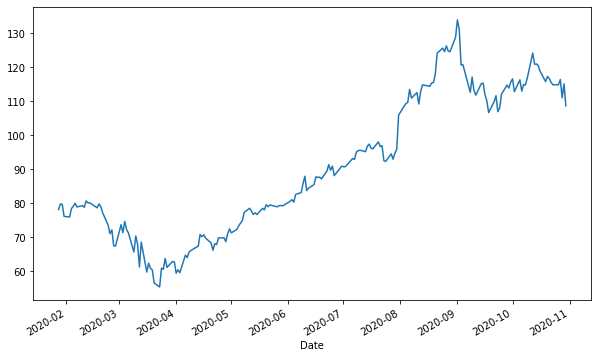

In [49]:
#movement of the stock over the time period

Apple['Adj Close'].plot(figsize=(10, 6), subplots=True)

In [20]:
S = Apple['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 108.67 .


In [21]:
#Calculating Annualized Volatility

log_return = np.log(Apple['Adj Close'] / Apple['Adj Close'].shift(1))
vol_h = np.sqrt(252)* log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 45.88 %


In [22]:
# Market Volatility
VIX = yf.download("^VIX", start="2019-10-31", end="2020-10-31")


[*********************100%***********************]  1 of 1 completed


In [23]:
VIX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-31,13.510000,13.95,13.180000,13.220000,13.220000,0
2019-11-01,12.500000,12.60,12.260000,12.300000,12.300000,0
2019-11-04,12.680000,13.13,12.440000,12.830000,12.830000,0
2019-11-05,12.850000,13.28,12.250000,13.100000,13.100000,0
2019-11-06,13.180000,13.39,12.600000,12.620000,12.620000,0
...,...,...,...,...,...,...
2020-10-26,29.379999,33.68,29.219999,32.459999,32.459999,0
2020-10-27,32.040001,33.77,31.850000,33.349998,33.349998,0
2020-10-28,34.689999,40.77,34.680000,40.279999,40.279999,0


In [24]:
print('The market volatility is', round(VIX['Adj Close'][-1],2) , '% .') 

The market volatility is 38.02 % .


In [26]:
Apple['Adj Close'].describe().round(2)

count    253.00
mean      85.52
std       20.24
min       55.29
25%       68.77
50%       78.76
75%      106.66
max      133.95
Name: Adj Close, dtype: float64

In [28]:
#As an alternative to percentage returns, log returns can be used. 
#In some scenarios, they are easier to handle and therefore often preferred 
#in a financial context.
rets = np.log(Apple['Adj Close'] / Apple['Adj Close'].shift(1))
rets.head().round(4)

Date
2019-10-31       NaN
2019-11-01    0.0280
2019-11-04    0.0065
2019-11-05   -0.0014
2019-11-06    0.0004
Name: Adj Close, dtype: float64

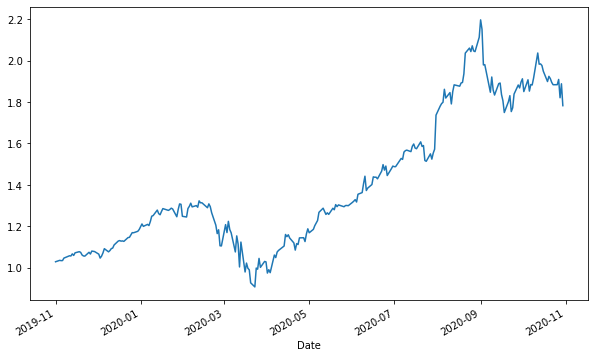

In [29]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

# Rolling statistics/financial indicators
simple statistics charts for traders using Apple time series


In [41]:

Apple['min'] = Apple['Adj Close'].rolling(10).min()
Apple['mean'] = Apple['Adj Close'].rolling(10).mean()
Apple['std'] =Apple['Adj Close'].rolling(10).std()
Apple['median'] = Apple['Adj Close'].rolling(10).median()
Apple['max'] = Apple['Adj Close'].rolling(10).max()
Apple['ewma'] = Apple['Adj Close'].ewm(halflife=0.5, min_periods=window).mean()
Apple.dropna().head()

,Open,High,Low,Close,Adj Close,Volume,min,mean,std,median,max,ewma
Date,,,,,,,,,,,,
2019-11-13,65.282501,66.195000,65.267502,66.117500,65.019051,102734400,60.973743,63.448814,1.149484,63.447998,65.019051,64.859155
2019-11-14,65.937500,66.220001,65.525002,65.660004,64.569160,89182800,62.704231,63.808356,0.797797,63.867268,65.019051,64.641659
2019-11-15,65.919998,66.445000,65.752502,66.440002,65.336212,100206400,63.025326,64.071554,0.826696,64.178261,65.336212,65.162574
2019-11-18,66.449997,66.857498,66.057503,66.775002,65.665634,86703200,63.025326,64.326517,0.889994,64.431484,65.665634,65.539869
2019-11-19,66.974998,67.000000,66.347504,66.572502,65.466507,76167200,63.052284,64.570635,0.825923,64.515076,65.665634,65.484847


In [42]:
Apple['SMA1'] = Apple['Adj Close'].rolling(20).mean()
Apple['SMA2'] = Apple['Adj Close'].rolling(60).mean()
Apple[['Adj Close', 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2020-10-26,114.851852,116.749080,116.286685
2020-10-27,116.399178,116.874364,116.417435
2020-10-28,111.008476,116.644260,116.446258
2020-10-29,115.121384,116.570887,116.537028
2020-10-30,108.672516,116.363245,116.456542


<AxesSubplot:xlabel='Date'>

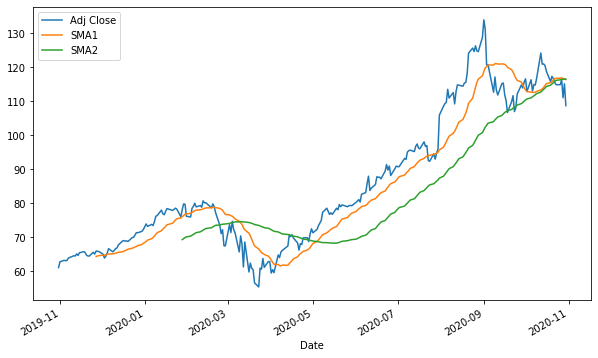

In [43]:
# plotting the above results as moving averages and adjust close price

Apple[['Adj Close', 'SMA1', 'SMA2']].plot(figsize=(10, 6))

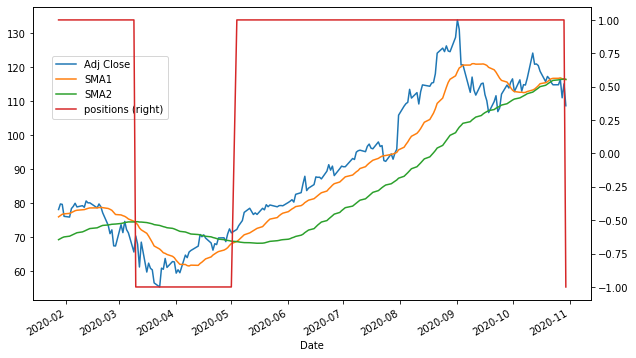

In [44]:
Apple.dropna(inplace=True)
Apple['positions'] = np.where(Apple['SMA1'] > Apple['SMA2'],1,-1)
ax = Apple[['Adj Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

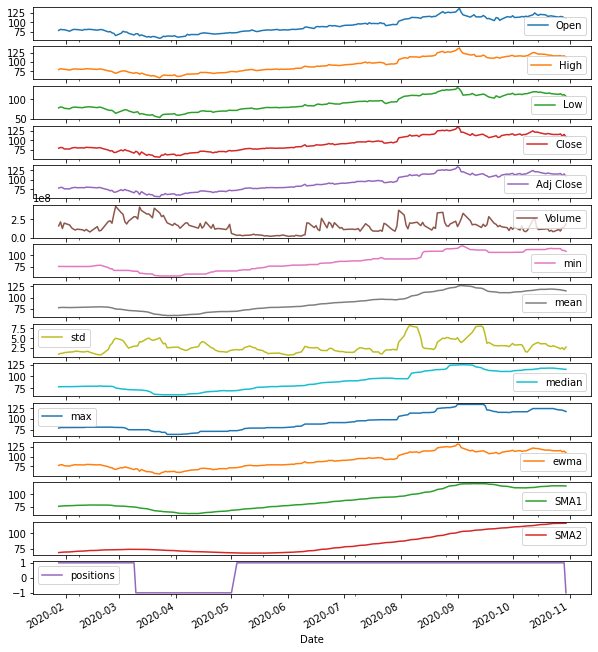

In [50]:
#Summary of Above for Apple
Apple.plot(figsize=(10, 12), subplots=True)

In [51]:
Apple.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume,min,mean,std,median,max,ewma,SMA1,SMA2,positions
count,194.00,194.00,194.00,194.00,194.00,1.940000e+02,194.00,194.00,194.00,194.00,194.00,194.00,194.00,194.00,194.0
mean,91.01,92.45,89.59,91.07,90.53,1.567358e+08,85.36,89.69,2.88,89.71,94.00,90.47,88.63,83.84,0.6
std,20.44,20.51,19.91,20.17,20.46,8.630319e+07,19.39,19.99,1.66,19.86,21.28,20.41,19.31,16.11,0.8
min,57.02,57.12,53.15,56.09,55.29,2.019780e+07,55.29,60.10,0.60,60.65,63.69,55.84,61.47,68.17,-1.0
25%,74.51,75.82,72.96,74.58,73.52,1.040909e+08,67.99,73.49,1.65,73.04,78.48,73.21,73.80,70.93,1.0
50%,87.58,88.33,86.23,87.66,87.36,1.451250e+08,80.30,83.82,2.52,83.71,87.90,87.12,81.52,74.43,1.0
75%,112.66,114.25,110.22,112.24,112.05,1.992050e+08,106.66,111.52,3.65,111.72,115.34,112.25,110.54,96.80,1.0
max,137.59,137.98,130.53,134.18,133.95,4.268848e+08,120.67,126.47,8.34,125.22,133.95,132.41,121.07,116.54,1.0


In [52]:

Data = yf.download("AAPL", start="2019-10-31", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [53]:
returns = np.log(Data['Adj Close']/Data['Adj Close'].shift(1))
returns.describe()


count    252.000000
mean       0.002293
std        0.028903
min       -0.137708
25%       -0.009284
50%        0.002402
75%        0.016447
max        0.113158
Name: Adj Close, dtype: float64

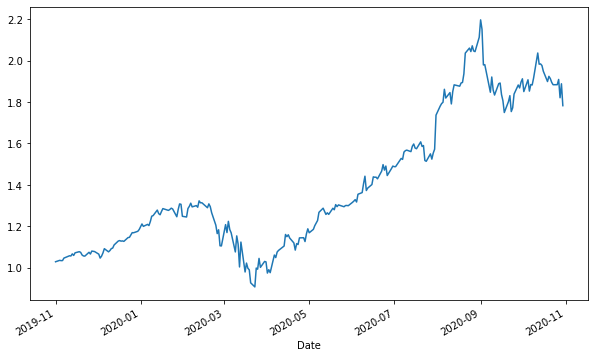

In [54]:

returns.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [55]:
Data = yf.download("AAPL ^GSPC", start="2019-10-31", end="2020-10-31")

[*********************100%***********************]  2 of 2 completed


In [56]:
returns = np.log(Data['Adj Close']/Data['Adj Close'].shift(1))
returns.describe()

,AAPL,^GSPC
count,252.000000,252.000000
mean,0.002293,0.000293
std,0.028903,0.021688
min,-0.137708,-0.127652
25%,-0.009284,-0.005699
50%,0.002402,0.002183
75%,0.016447,0.008291
max,0.113158,0.089683


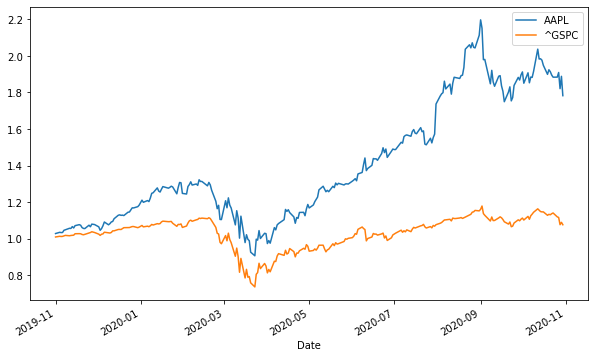

In [57]:
#Plotting AAPL against GSPC to see Apple stock's movement relative to the S&P 500
returns.cumsum().apply(np.exp).plot(figsize=(10, 6));

#performance of Apple against the Benchmark of the S&P500 is shown below.
#Apple seems to have outperformed the market. 

In [58]:

returns.mean() * 252

AAPL     0.577896
^GSPC    0.073723
dtype: float64

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [5]:
Vola = yf.download("^VIX", start="2006-10-31", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [6]:
Vola

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-31,11.100000,11.39,10.990000,11.100000,11.100000,0
2006-11-01,10.930000,11.68,10.890000,11.510000,11.510000,0
2006-11-02,11.610000,11.76,11.410000,11.420000,11.420000,0
2006-11-03,11.160000,11.43,10.340000,11.160000,11.160000,0
2006-11-06,11.390000,11.41,10.990000,11.160000,11.160000,0
...,...,...,...,...,...,...
2020-10-26,29.379999,33.68,29.219999,32.459999,32.459999,0
2020-10-27,32.040001,33.77,31.850000,33.349998,33.349998,0
2020-10-28,34.689999,40.77,34.680000,40.279999,40.279999,0


array([<AxesSubplot:xlabel='Date'>], dtype=object)

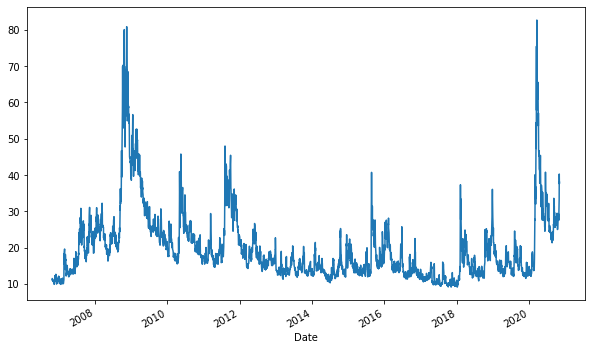

In [7]:
Vola['Adj Close'].plot(figsize=(10, 6), subplots=True)

In [8]:
sp5 = yf.download("^GSPC", start="2019-10-31", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [9]:
sp5

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-31,3046.899902,3046.899902,3023.189941,3037.560059,3037.560059,4139280000
2019-11-01,3050.719971,3066.949951,3050.719971,3066.909912,3066.909912,3930200000
2019-11-04,3078.959961,3085.199951,3074.870117,3078.270020,3078.270020,4146850000
2019-11-05,3080.800049,3083.949951,3072.149902,3074.620117,3074.620117,4486130000
2019-11-06,3075.100098,3078.340088,3065.889893,3076.780029,3076.780029,4458190000
...,...,...,...,...,...,...
2020-10-26,3441.419922,3441.419922,3364.860107,3400.969971,3400.969971,3988080000
2020-10-27,3403.149902,3409.510010,3388.709961,3390.679932,3390.679932,3946990000
2020-10-28,3342.479980,3342.479980,3268.889893,3271.030029,3271.030029,5129860000


In [10]:
log_return = np.log(sp5['Adj Close'] / sp5['Adj Close'].shift(1))
vol_h = np.sqrt(252)* log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 34.43 %
